# Assignment 1
## Cifar-10 classification with Fully Connected Network

The task was to improve the example provided by the teacher so that the image recognition accuracy would reach at least 50–55%, with an ambitious target of 57–60%.



## Teachers example

First we import the necessary libraries.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

I0000 00:00:1762108312.446793   29957 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1762108312.487217   29957 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1762108313.748304   29957 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Tensorflow is used for the backend of the project.

In [2]:
from keras import backend as K
print(K.backend())

tensorflow


# Creating model




When the model is created, 32×32×3 pixel input dimensions are used, resulting in 3072 units in the input layer. This corresponds to (width × height × color channels).
Next, a Flatten layer converts the 3D input into a 2D matrix. After that, a Dense (fully connected) layer with 256 neurons is used as a hidden layer.
Finally, the output layer consists of 10 neurons, each representing one of the image classes.

The target classes are:<br>
**airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck**.

In [3]:
# Create the model
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs) # Flatten the input for the dense layers
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

model.summary()


W0000 00:00:1762108315.175619   29957 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1762108315.179740   29957 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1762108315.312209   29957 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12690 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,258 (3.01 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

Dataset is downloaded from keras repository

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Before training, the model needs to be compiled, which defines how it will learn and be evaluated.
In this case, the model is compiled using Sparse Categorical Crossentropy as the loss function, Adam as the optimizer, and accuracy as the evaluation metric.

In [5]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

# Training

In [6]:
epochs = 10

history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_split=0.2)


Epoch 1/10


I0000 00:00:1762108319.173183   30087 service.cc:158] XLA service 0x724fd00416f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762108319.173226   30087 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1762108319.184806   30087 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762108319.241708   30087 cuda_dnn.cc:463] Loaded cuDNN version 91002
I0000 00:00:1762108319.525354   30222 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_10', 8 bytes spill stores, 8 bytes spill loads



 90/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1652 - loss: 2.6054

I0000 00:00:1762108320.258838   30087 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3192 - loss: 1.9222 - val_accuracy: 0.3465 - val_loss: 1.8317
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3806 - loss: 1.7449 - val_accuracy: 0.3818 - val_loss: 1.7467
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4080 - loss: 1.6695 - val_accuracy: 0.4048 - val_loss: 1.7028
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4263 - loss: 1.6201 - val_accuracy: 0.4233 - val_loss: 1.6218
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4372 - loss: 1.5867 - val_accuracy: 0.4382 - val_loss: 1.5937
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4483 - loss: 1.5565 - val_accuracy: 0.4335 - val_loss: 1.6026
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4518 - loss: 1.5392 - val_accuracy: 0.4316 - val_loss: 1.6140
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4588 - loss: 1.5279 - val_accuracy: 0.4411 - val_

# Plotting the results


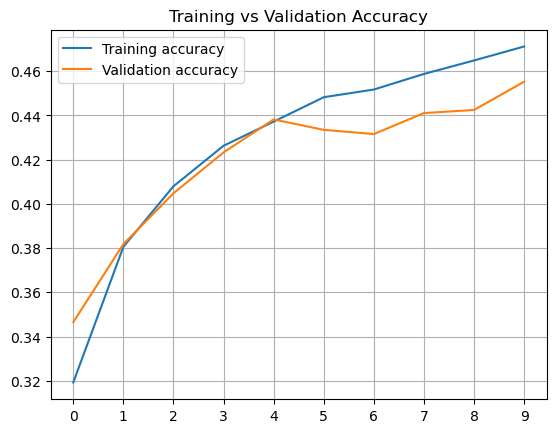

In [7]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

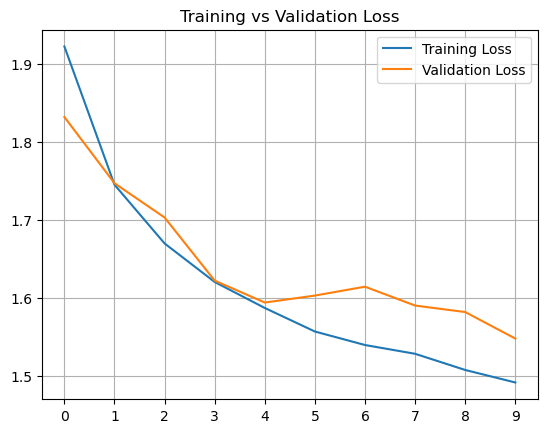

In [8]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()


In [9]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

313/313 - 1s - 3ms/step - accuracy: 0.4536 - loss: 1.5401
Test loss: 1.5401301383972168
Test accuracy: 0.4535999894142151
Final training accuracy: 0.47122499346733093
Final training loss: 1.4911258220672607
Final validation accuracy: 0.4553000032901764
Final validation loss: 1.5475178956985474


# Picture recognition results

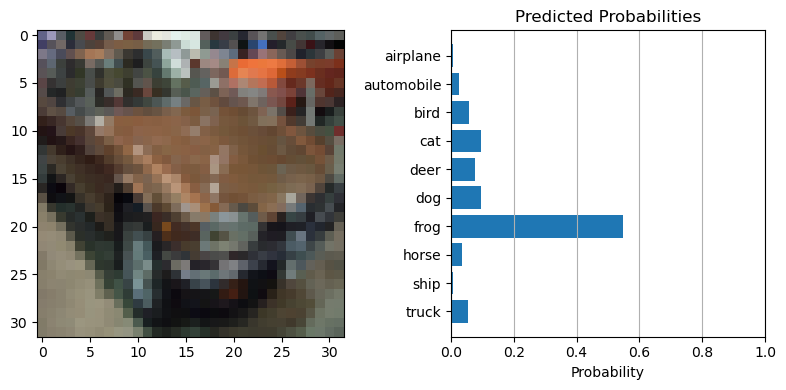

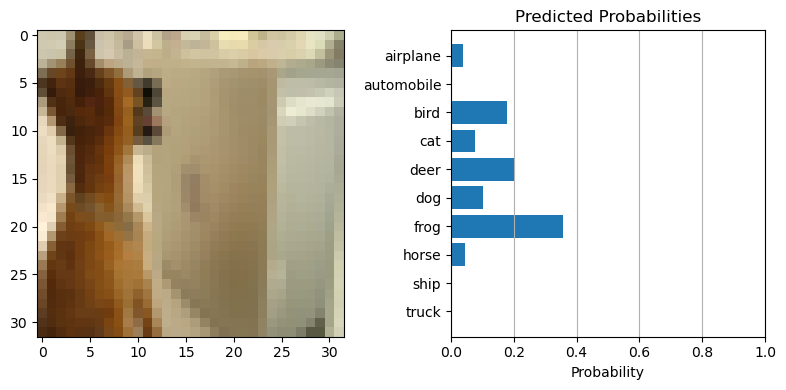

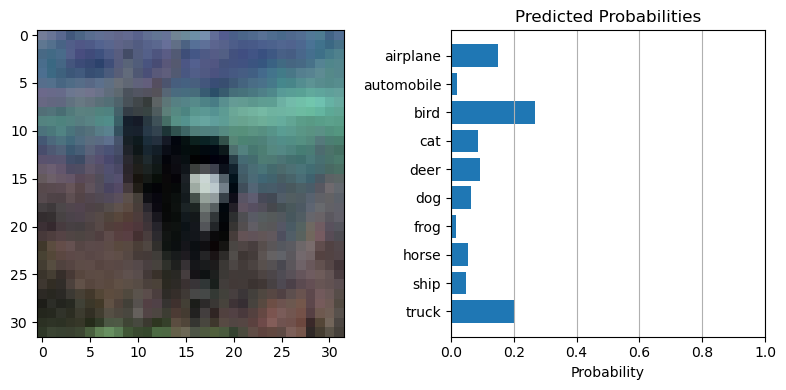

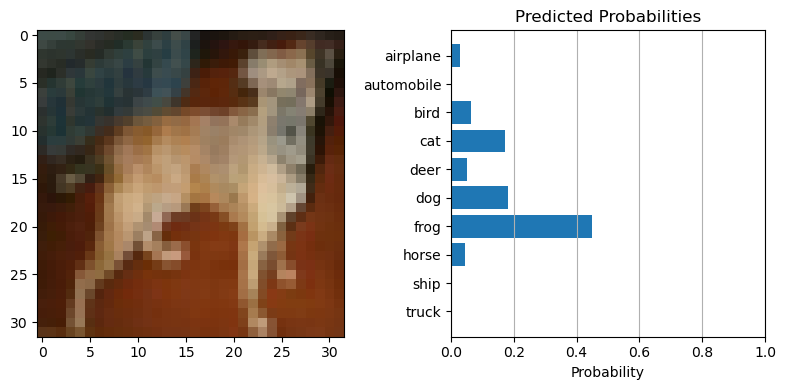

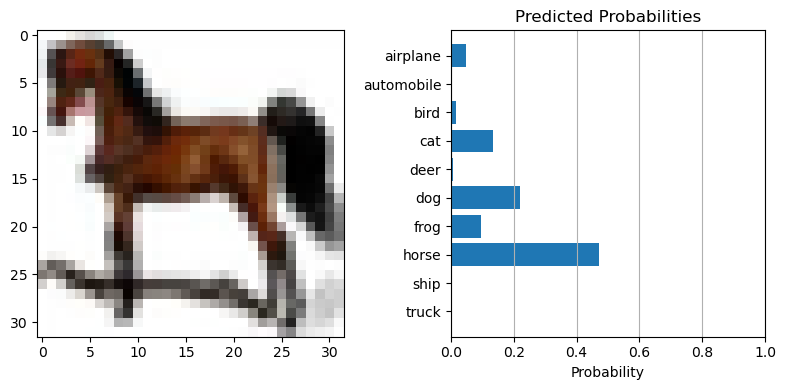

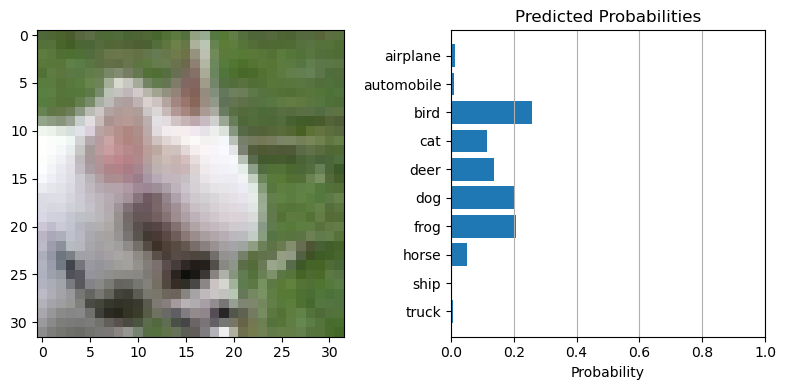

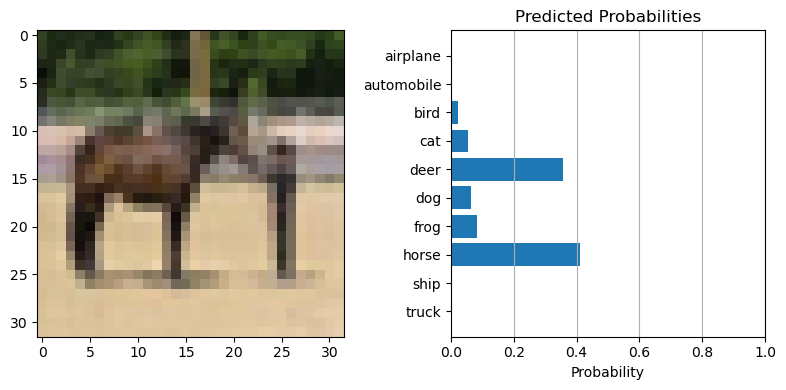

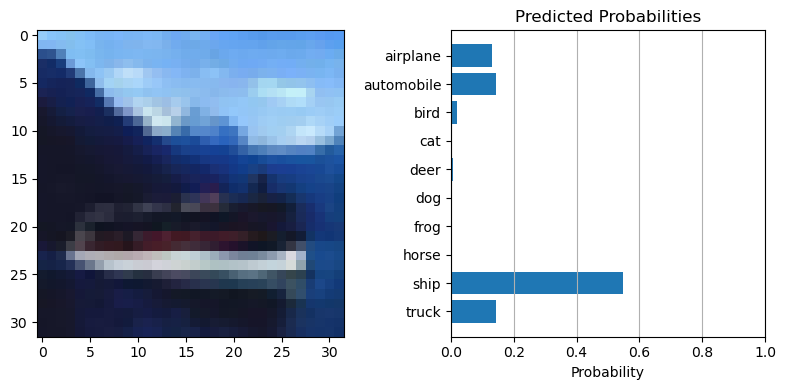

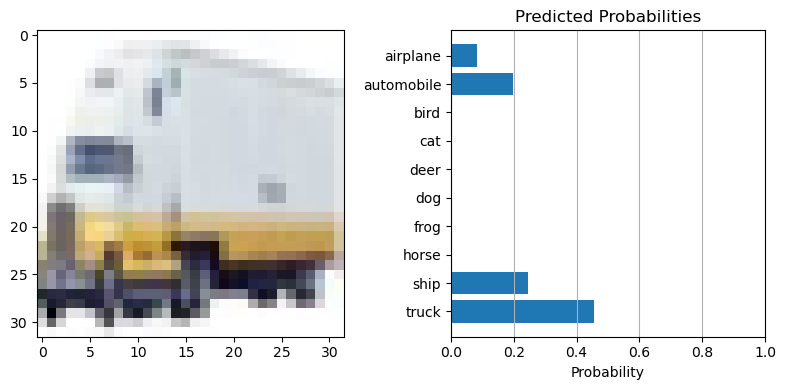

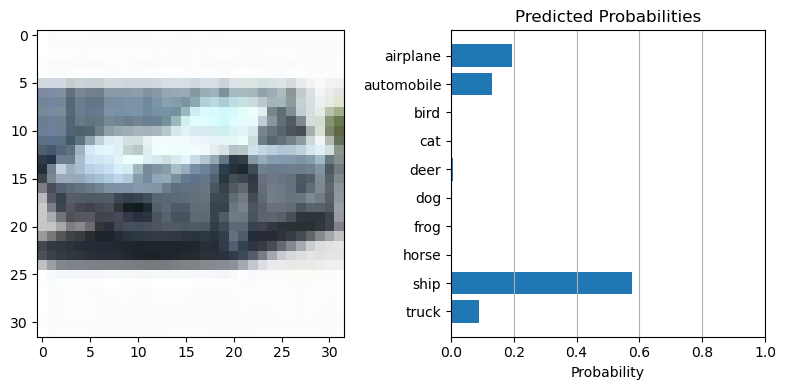

In [10]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4)) # Increased figure height for better horizontal plot
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.barh(ind, y[start+k].numpy().flatten()) # Use barh for horizontal bars
    plt.yticks(ind, targets) # Use yticks for vertical labels
    plt.gca().invert_yaxis() # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability") # Label the x-axis as probability
    plt.title("Predicted Probabilities") # Add a title to the bar plot
    plt.xlim(0, 1) # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x') # Add grid lines for the x-axis
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

# Modified model
In this section, the teacher’s example was improved by optimizing parameters and adjusting the number of neurons.

## Creating the model
The original layer structure was modified to use four hidden layers instead of one. Batch normalization and dropout were added to prevent overfitting.

In [11]:
# Create the model
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs) # Flatten the input for the dense layers
x = layers.Dense(1024, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(512, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(256, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(64, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     3,145,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,825,546 (14.59 MB)

 Trainable params: 3,821,834 (14.58 MB)

 Non-trainable params: 3,712 (14.50 KB)

The training set was split into 80% training data and 20% validation data using train_test_split.
This separation was done to enable the use of data augmentation (image manipulation) with the training set.

In [12]:
from sklearn.model_selection import train_test_split

# load cifar 10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# train set is split to validation set and train because datagen image manipulation is used
x_train_part, x_val, y_train_part, y_val = train_test_split(x_train, y_train, test_size=0.2)


## Training the model
Image manipulation (data augmentation) was used to improve validation accuracy and prevent overfitting. It skews, rotates, and resizes images so that the model does not see the exact same image twice during training.
A learning rate reducer was applied to gradually decrease the learning rate toward the end of training, helping the model converge more smoothly.
Additionally, an early stopping callback was used to prevent overfitting and to stop training once the validation performance stopped improving.

In [14]:
from keras.src.callbacks import ReduceLROnPlateau
from keras.src.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# this rotates and skew images so in learning phase, model doesnt see  exact same picture again
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

epochs = 250
batch_size = 128

# this decreases automatically learning rate towards the end
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)
# AdamW is working better with regulizers
optimizer = AdamW(learning_rate=0.0002, weight_decay=1e-5)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto', restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(
    datagen.flow(x_train_part, y_train_part, batch_size=batch_size),
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[earlystop,reduce_lr]
)

Epoch 1/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5932 - loss: 1.2800 - val_accuracy: 0.5033 - val_loss: 1.5374 - learning_rate: 2.0000e-04
Epoch 2/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5849 - loss: 1.2951 - val_accuracy: 0.5226 - val_loss: 1.4655 - learning_rate: 2.0000e-04
Epoch 3/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5874 - loss: 1.2910 - val_accuracy: 0.5424 - val_loss: 1.4272 - learning_rate: 2.0000e-04
Epoch 4/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5875 - loss: 1.2926 - val_accuracy: 0.5121 - val_loss: 1.5217 - learning_rate: 2.0000e-04
Epoch 5/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5907 - loss: 1.2896 - val_accuracy: 0.5173 - val_loss: 1.4605 - learning_rate: 2.0000e-04
Epoch 6/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5908 - loss: 1.2858 - val_accuracy: 0.5098 - val_loss: 1.5035 - learning_rate: 2.0000e-04
Epoch 7/250
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/st

# Plotting results

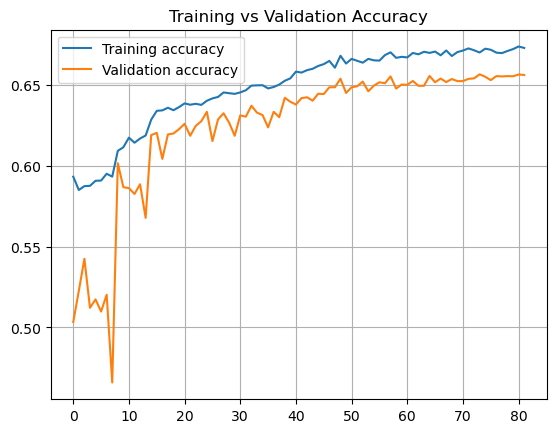

In [15]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

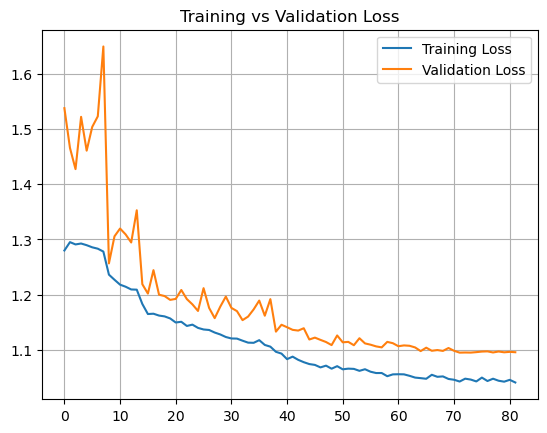

In [16]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

# Evaluation metrics

In [17]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

313/313 - 1s - 2ms/step - accuracy: 0.6549 - loss: 1.1046
Test loss: 1.1045615673065186
Test accuracy: 0.6549000144004822
Final training accuracy: 0.6728249788284302
Final training loss: 1.0413742065429688
Final validation accuracy: 0.6560999751091003
Final validation loss: 1.0960781574249268


# Picture recognition results

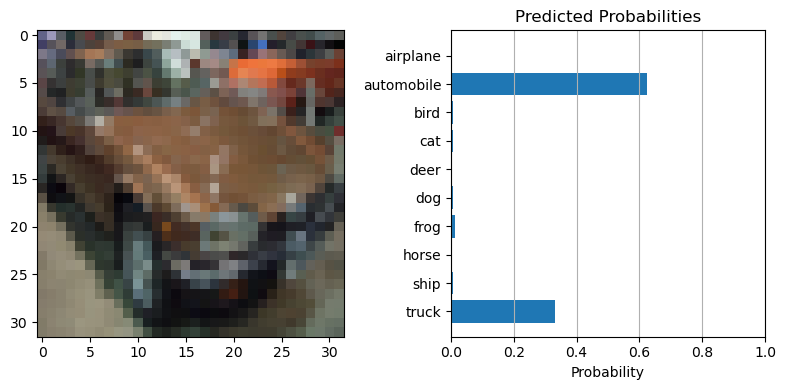

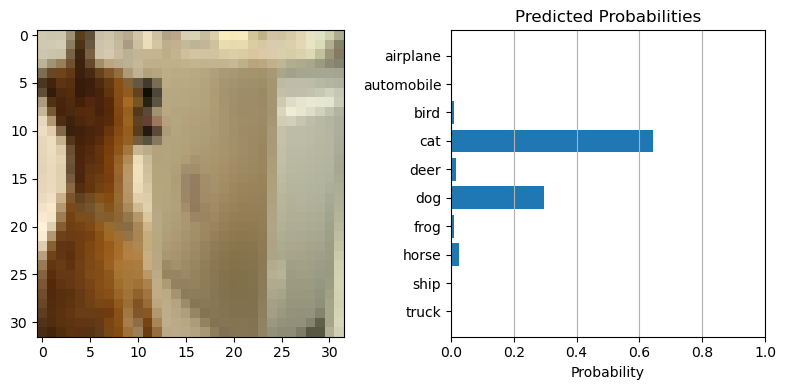

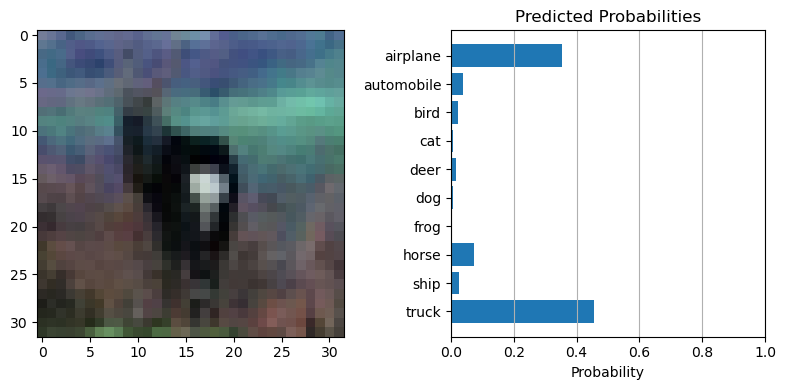

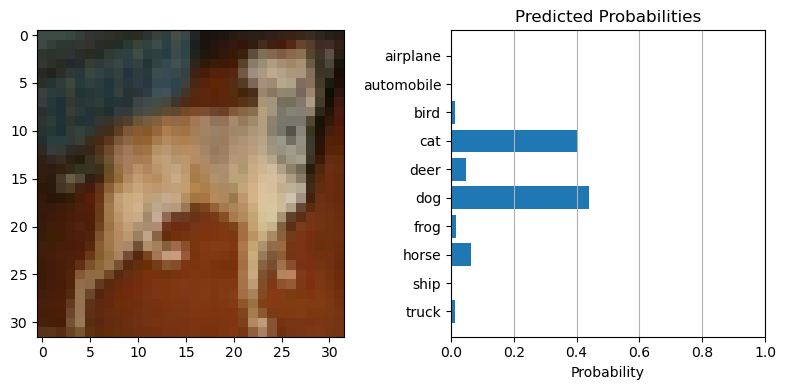

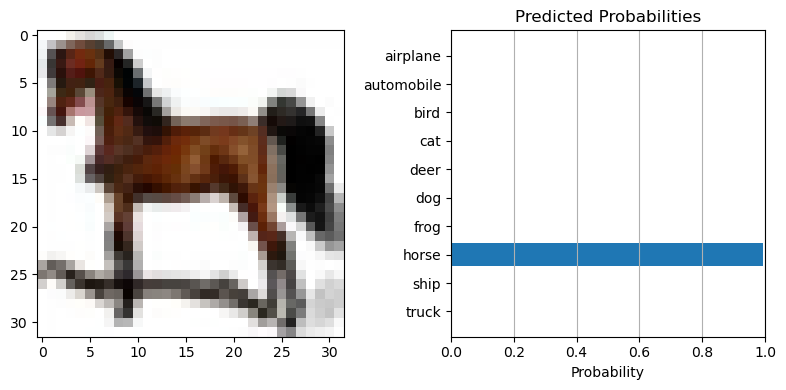

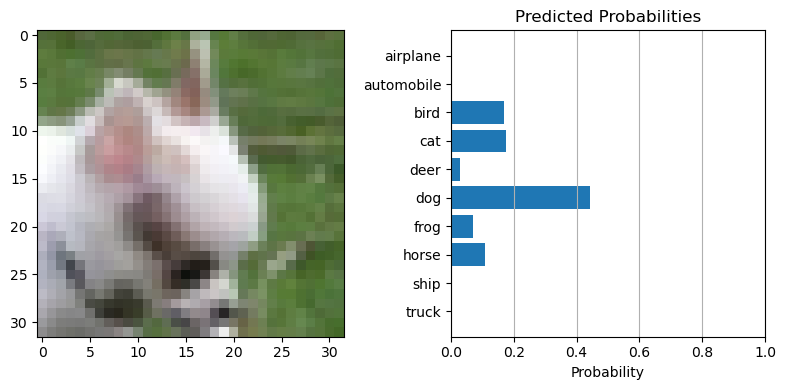

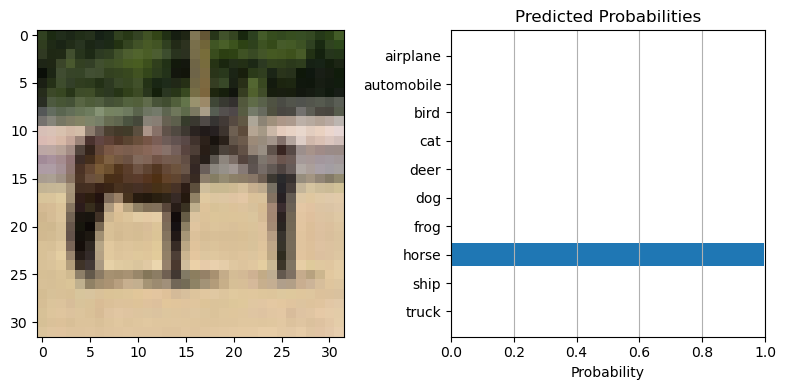

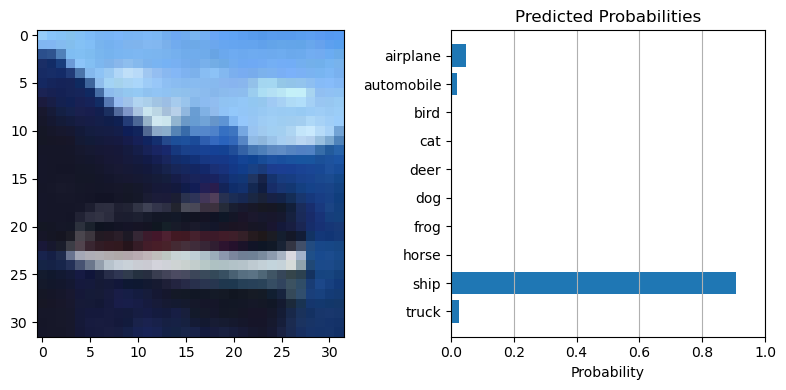

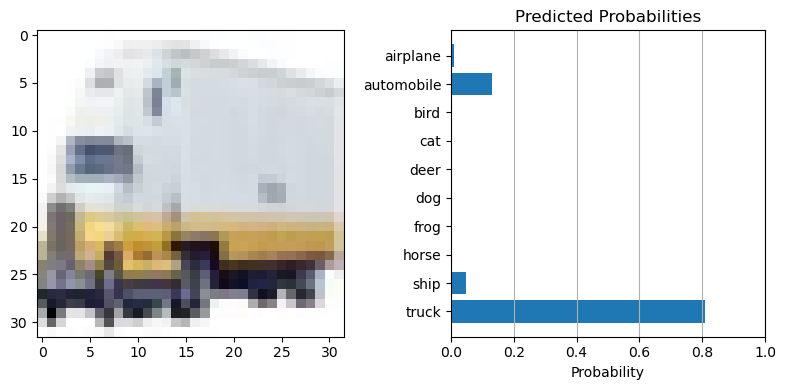

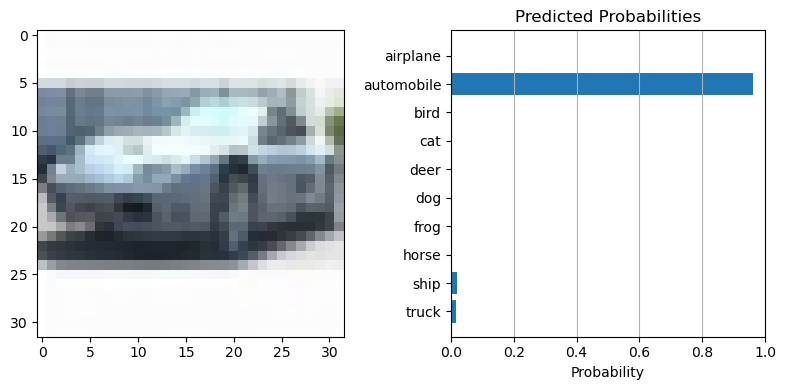

In [18]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4)) # Increased figure height for better horizontal plot
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.barh(ind, y[start+k].numpy().flatten()) # Use barh for horizontal bars
    plt.yticks(ind, targets) # Use yticks for vertical labels
    plt.gca().invert_yaxis() # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability") # Label the x-axis as probability
    plt.title("Predicted Probabilities") # Add a title to the bar plot
    plt.xlim(0, 1) # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x') # Add grid lines for the x-axis
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()